In [6]:
from skimage import io, color
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def calculate_gradient(img, template):
    ts = template.size
    new_img = np.zeros((img.shape[0] + ts - 1, img.shape[1] + ts - 1))
    new_img[np.uint16((ts - 1) / 2.0) : img.shape[0] + np.uint16((ts - 1) / 2.0), np.uint16((ts - 1) / 2.0) : img.shape[1] + np.uint16((ts - 1) / 2.0)] = img
    result = np.zeros((new_img.shape))

    for r in np.uint16(np.arange((ts - 1) / 2.0, img.shape[0] + (ts - 1) / 2.0)):
        for c in np.uint16(np.arange((ts - 1) / 2.0, img.shape[1] + (ts - 1) / 2.0)):
            curr_region = new_img[r - np.uint16((ts - 1) / 2.0) : r + np.uint16((ts - 1) / 2.0) + 1, c - np.uint16((ts - 1) / 2.0) : c + np.uint16((ts - 1) / 2.0) + 1]
            curr_region = curr_region * template
            score = np.sum(curr_region)
            result[r, c] = score

    result_img = result[np.uint16((ts - 1) / 2.0) : result.shape[0] - np.uint16((ts - 1) / 2.0), np.uint16((ts - 1) / 2.0) : result.shape[1] - np.uint16((ts - 1) / 2.0)]
    return result_img

In [5]:
def gradient_magnitude(horizontal_gradient, vertical_gradient):
    horizontal_gradient_square = np.power(horizontal_gradient, 2)
    vertical_gradient_square = np.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = np.sqrt(sum_squares)
    return grad_magnitude

In [6]:
def gradient_direction(horizontal_gradient, vertical_gradient):
    grad_direction = np.arctan(vertical_gradient / (horizontal_gradient + 0.00000001))
    grad_direction = np.rad2deg(grad_direction)
    grad_direction = grad_direction % 180
    return grad_direction

In [34]:
def hog_cel_histogram(cell_direction, cell_magnitude, hist_bins):
    hog_cell_hist = np.zeros(shape=(hist_bins.size))
    cell_size = cell_direction.shape[0]

    for rox_idx in range(cell_size):
        for col_idx in range(cell_size):
            curr_direction = cell_direction[rox_idx, col_idx]
            curr_magnitude = cell_magnitude[rox_idx, col_idx]
            diff = np.abs(curr_direction - hist_bins)

            if curr_direction < hist_bins[0]:
                first_bin_idx = 0
                second_bin_idx = hist_bins.size - 1
            elif curr_direction > hist_bins[-1]:
                first_bin_idx = hist_bins.size - 1
                second_bin_idx = 0
            else:
                first_bin_idx = np.where(diff == np.min(diff))[0][0]
                temp = hist_bins[[(first_bin_idx - 1) % hist_bins.size, (first_bin_idx + 1) % hist_bins.size]]
                temp2 = np.abs(curr_direction - temp)
                res = np.where(temp2 == np.min(temp2))[0][0]

                if res == 0 and first_bin_idx != 0:
                    second_bin_idx = first_bin_idx - 1
                else:
                    second_bin_idx = first_bin_idx + 1

            first_bin_value = hist_bins[first_bin_idx]
            second_bin_value = hist_bins[second_bin_idx]
            hog_cell_hist[first_bin_idx] = hog_cell_hist[first_bin_idx] + (np.abs(curr_direction - first_bin_value) / (180.0 / hist_bins.size)) * curr_magnitude
            hog_cell_hist[second_bin_idx] = hog_cell_hist[second_bin_idx] + (np.abs(curr_direction - second_bin_value) / (180.0 / hist_bins.size)) * curr_magnitude
            
    return hog_cell_hist


In [7]:
img = io.imread("../Image/face.jpg")

C:\Users\phong.nguyen-thang\AppData\Local\Temp\ipykernel_18720\1344939353.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


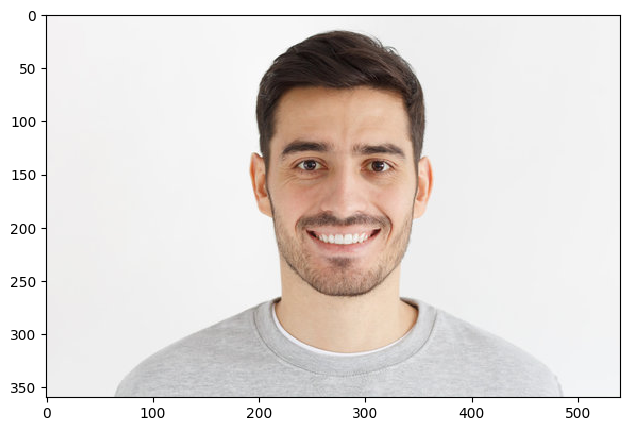

In [8]:
io.imshow(img)

In [9]:
gray_img = color.rgb2gray(img)

C:\Users\phong.nguyen-thang\AppData\Local\Temp\ipykernel_18720\1330168991.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gray_img)


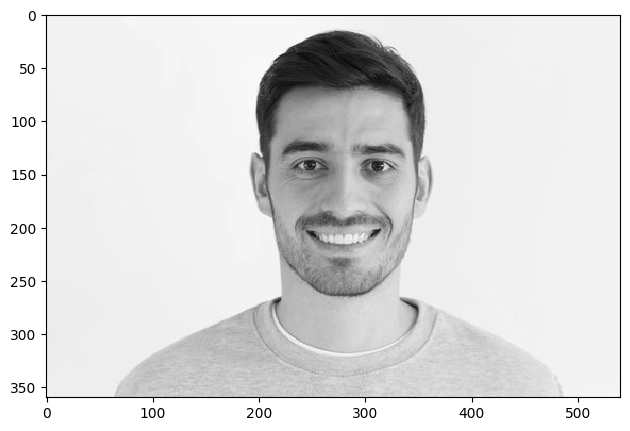

In [10]:
io.imshow(gray_img)

In [22]:
horizontal_mask = np.array([-1, 0, 1])
vertical_mask = np.array([[-1], [0], [1]])

In [23]:
horizontal_gradient = calculate_gradient(gray_img, horizontal_mask)
vertical_gradient = calculate_gradient(gray_img, vertical_mask)

In [24]:
grad_magnitude = gradient_magnitude(horizontal_gradient, vertical_gradient)
grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)

In [26]:
grad_direction = grad_direction % 180

In [27]:
hist_bins = np.array([10, 30, 50, 70, 90, 110, 130, 150, 170])

In [28]:
cell_direction = grad_direction[:8, :8]
cell_magnitude = grad_magnitude[:8, :8]

In [38]:
cell_direction

array([[ 44.99999985,  89.9999998 ,  89.9999998 ,  89.9999998 ,
         89.9999998 ,  89.9999998 ,  89.9999998 ,  89.9999998 ],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.99999936, 179.99999936, 179.99999936],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.99999936, 179.99999936, 179.99999936],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.99999936, 179.99999936, 179.99999936],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.99999936, 179.99999936, 179.99999936],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.99999936, 179.99999936, 179.99999936],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.99999936, 179.99999936, 179.99999936],
       [  0.        , 179.99999936, 179.99999936, 179.99999936,
        179.99999936, 179.9999993

In [39]:
cell_magnitude

array([[2.68974657e+00, 2.85290706e+00, 2.85290706e+00, 2.85290706e+00,
        2.85290706e+00, 2.85290706e+00, 2.85290706e+00, 2.85290706e+00],
       [2.85290706e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [2.85290706e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [2.85290706e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [2.85290706e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [2.85290706e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16],
       [2.85290706e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.

In [35]:
hog_cell_hist = hog_cel_histogram(cell_direction, cell_magnitude, hist_bins)

In [37]:
hog_cell_hist

array([9.98517471e+00, 2.01730991e+00, 6.72436663e-01, 1.99703492e+01,
       2.00535231e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69747970e+02])

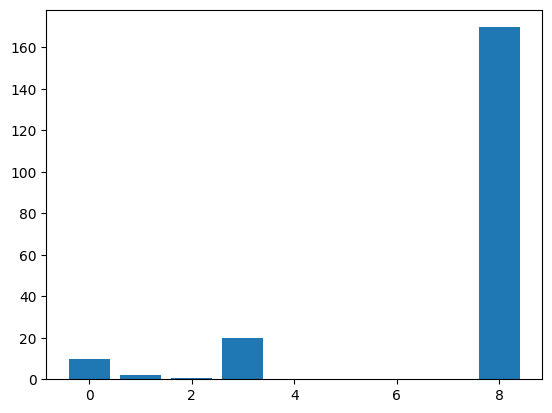

In [36]:
plt.bar(x=np.arange(9), height=hog_cell_hist, align='center', width=0.8)
plt.show()